## Assessment Cover Page

***

### Student Full Name: Ilia Grishkin
### Student Number: 2024139
### Module Title: Data Visualisation Techniques 
### Assessment Title: CA1_DataViz_HDip 
### Assessment Due Date: 20/10/2024
### Date of Submission: 19/10/2024

***

<div style="border: 1px solid black; padding: 10px;">

**Declaration**

By submitting this assessment, I confirm that I have read the CCT policy on academic misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. 
I declare it to be my own work and that all material from third parties has been appropriately referenced.
 I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.
</div>

***

# Content 

- General visuals' composition
- Storytelling and DataVis.
- Libraries
- EDA
    - Summary
    - Missing Values
- Task 1: Top 5 Games
    - Final Visual
    - Data displaied
    - Visual techniques
- Task 2: Japanese sales VS. North American Sales
    - Final Visual
    - Data displaied
    - Visual techniques
- Task 3: Top 4 Genres
    - Final Visual
    - Data displaied
    - Visual techniques
- Task 4: EU Sales before and after 2005
    - Final Visual
    - Data displaied
    - Visual techniques
- Task 5: Top 3 Developers
    - Preparation
    - Final Visual
    - Data displaied
    - Visual techniques
- Task 6: Nintendo Annual sales
    - Final Visual
    - Data displaied
    - Visual techniques
- References
***

## General visuals' composition 

There are many types of general compositions in visual design, which, in my opinion, should be carefully considered in the planning stage. Depending on the viewers we are displaying data to, we should determine the appropriate properties and layers to include in our visualisation.

Slightly unrelated to the subject, I have always been inspired by Renaissance painters and their ability to make their works attractive to a wide range of people. Firstly, a viewer may be drawn to the simple, visually pleasing image of a vase with fruit, but as they come closer, they notice smaller details surrounding the scene. And for those familiar with symbolism, the painting shows an entire narrative prepared by the artist.

Unfortunately, painting vases is slightly outside the scope of this CA, we still can apply similar logic to our visuals. First, we should present easily recognisable elements that cause an almost immediate response but are not very complex or technical. Those elements should not require advanced knowledge of math or statistics.

Next, we can add a layer with additional information for viewers who want to explore the visual further. This layer can provide extra detailes about data, such as statistical properties or context related to the main subject.

Lastly, if it is applicable, we can place additional data around the main object to provide the viewer with more context.

## Storytelling and DataVis.

Storytelling techniques are commonly applied in data visualisation. This methodology has developed significantly in recent decades, and now the majority of effective visuals include these techniques. Briefly, classical storytelling structures based on how the human mind is accustomed to getting information, specifically  when it comes to complex data that changes over time.

Many traditional plots effectively display information, but in my opinion, they are not always as effective as they could be. For example, a bar plot is a popular way to present numerical and categorical data, but the main subject of the plot is often outside the chart in usually in the title or labels. However, the central object or "character" should be the first thing we recognise. Only once we understand the subject can we fully process the related information.

In this assignment, we will apply a basic storytelling approach, specifically by introducing a "character" into the visualisation. Simply placing the key object directly on the chart can which help viewers understand the data more quickly, with no need to dive deeply into numbers or labels.


# Libraries

In [1]:
# !pip install matplotlib_venn
# !pip install missingno

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib_venn import venn2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle

from scipy import stats

# EDA

## Summary

In [2]:
df = pd.read_csv('vgsales.csv')
df.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


### Missing Values

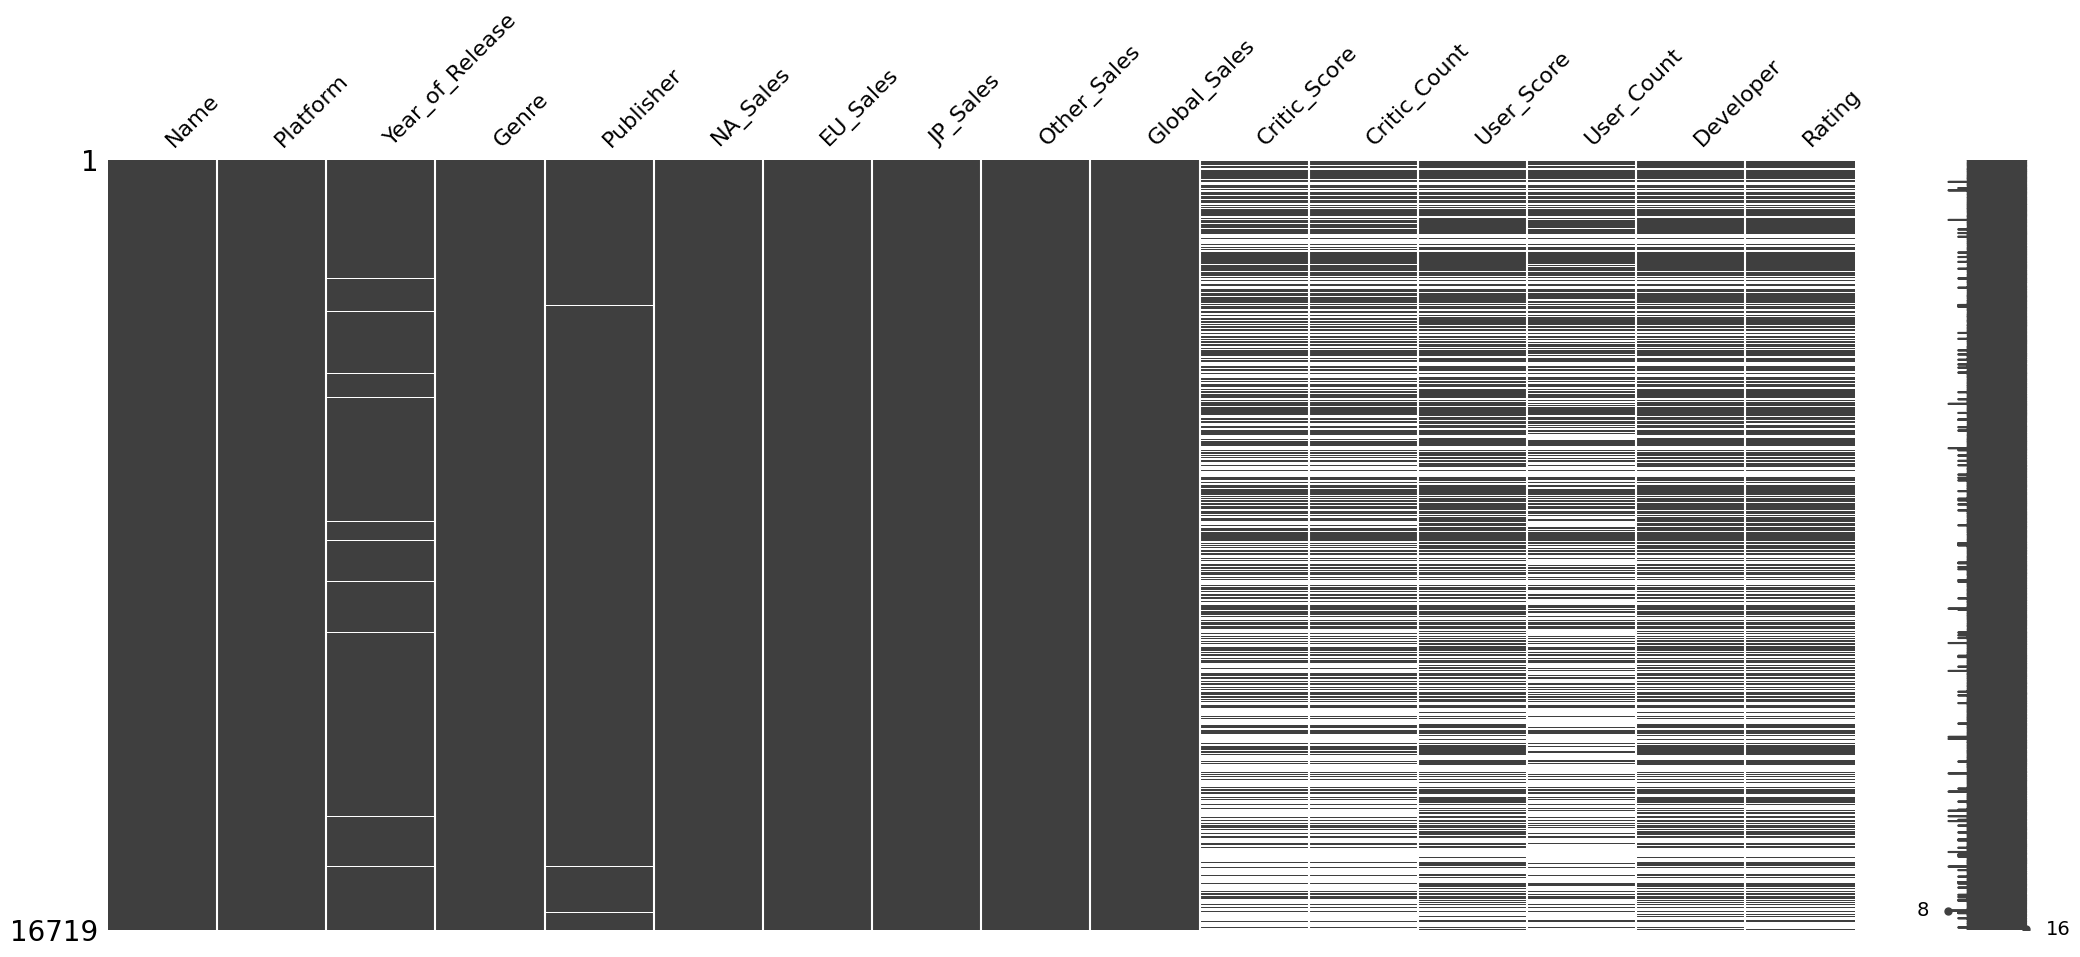

In [4]:
df_missing = df.copy()
msno.matrix(df_missing);

In [5]:
missing_values = df_missing.isnull().sum()
print(missing_values)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [6]:
missing_names = df_missing[df_missing['Name'].isnull()]
print(missing_names)

      Name Platform  Year_of_Release Genre              Publisher  NA_Sales  \
659    NaN      GEN           1993.0   NaN  Acclaim Entertainment      1.78   
14246  NaN      GEN           1993.0   NaN  Acclaim Entertainment      0.00   

       EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
659        0.53      0.00         0.08          2.39           NaN   
14246      0.00      0.03         0.00          0.03           NaN   

       Critic_Count User_Score  User_Count Developer Rating  
659             NaN        NaN         NaN       NaN    NaN  
14246           NaN        NaN         NaN       NaN    NaN  


# Task 1: Top 5 Games

## Task 1: Final Visual

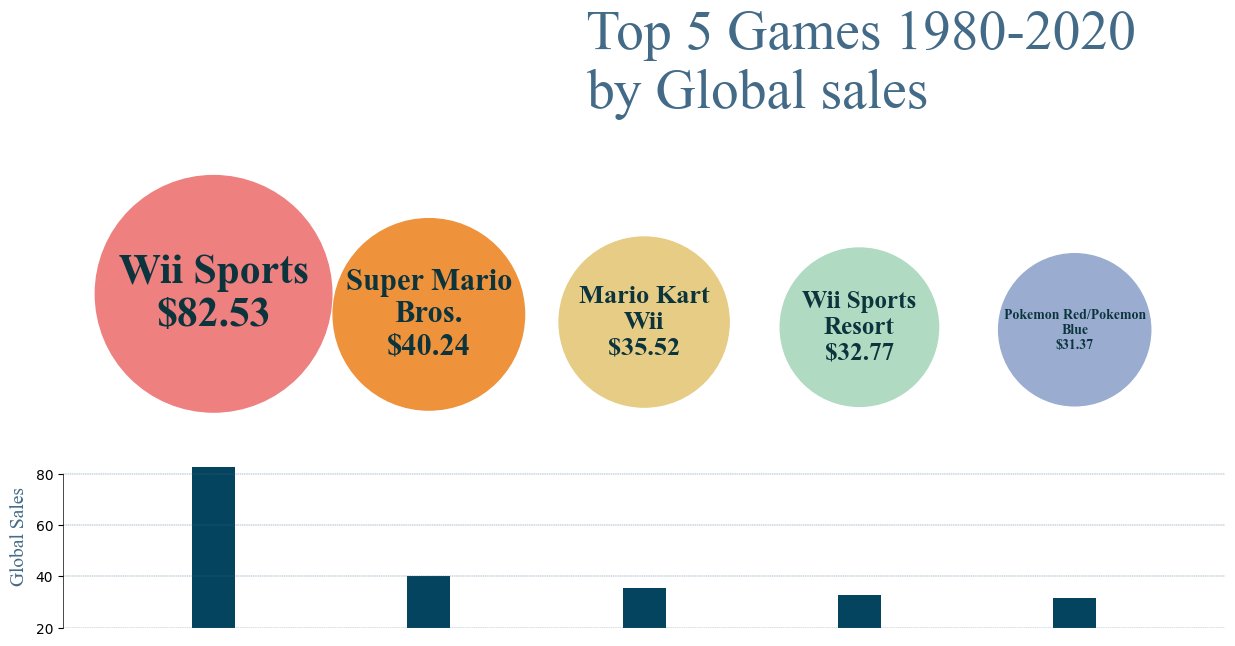

In [7]:
#-------------Data--------------------------

## Read file and get top 5 by Global sales
df = pd.read_csv('vgsales.csv')
df_task1 = df.sort_values(by='Global_Sales', ascending=False).head(5)


#------------Properties--------------

## Positions for bubbles on x
x_positions = [1, 2, 3, 4, 5]  

## Positions for bubbles on y
y_positions = [150, 142, 139, 137, 136]

## Sizes of bubbles
bubble_sizes = [29000, 19000, 15000, 13000, 12000] 

## Define font properties for each bubble
font_properties = [
    {'fontname': 'Times New Roman', 'fontsize': 30, 'fontweight': 'bold', 'color': '#0c343d'},
    {'fontname': 'Times New Roman','fontsize': 22, 'fontweight': 'bold', 'color': '#0c343d'},
    {'fontname': 'Times New Roman','fontsize': 19, 'fontweight': 'bold', 'color': '#0c343d'},
    {'fontname': 'Times New Roman','fontsize': 18, 'fontweight': 'bold', 'color': '#0c343d'},
    {'fontname': 'Times New Roman','fontsize': 10, 'fontweight': 'bold', 'color': '#0c343d'}
]

# ----------Plotting----------------

# Initiate plot
plt.figure(figsize=(15, 7))

# Barplot
plt.bar(x_positions, df_task1['Global_Sales'], width=0.2, color='#05445E')

# Scaterplot for bubbles
plt.scatter(x_positions, y_positions, s=bubble_sizes,
            color=['#ee8080', '#ee923c', '#e6cc84', '#b0dac2', '#9aadd1'])

# Set names and sales figure inside of the bubbles
## Inclide function for splitting the name into rows
for i, row in df_task1.iterrows():
    game_name = row['Name'].split()
    
    # If there are more than two words, split the name into two lines
    if len(game_name) > 2:
        name_text = ' '.join(game_name[:2]) + '\n' + ' '.join(game_name[2:])
    else:
        name_text = ' '.join(game_name)
    
    # Add the sales figure in a new line
    text_to_display = f"{name_text}\n${row['Global_Sales']}"
    
    # Plot the text inside the bubble 
    plt.text(x_positions[i], y_positions[i], text_to_display, 
             ha='center', va='center', **font_properties[i], zorder=2)

# Set labeles
plt.yticks(range(0, 85, 20), fontsize=10)  # Y-axis from 0 to 80
plt.ylabel("Global Sales", fontsize=14, labelpad=-1, color='#436b88',family='Times New Roman' )

ax = plt.gca()

ax.spines['top'].set_visible(False)      
ax.spines['right'].set_visible(False)    
ax.spines['bottom'].set_visible(False) 
ax.spines['left'].set_linewidth(0.5) 
ax.spines['left'].set_bounds(20, 80)

ax.yaxis.set_label_coords(-0.03, 0.17)

# Remove x-axis labels
plt.xticks([], []) 

plt.xlim(0.3, 5.7)

plt.ylim(20, 230)

# Add gridlines
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.3, color='#436b88')

# Add title
plt.title("Top 5 Games 1980-2020 \nby Global sales", fontsize=40, x=0.45, y=0.95,  color='#436b88',family='Times New Roman' , ha='left')

# Show the plot
plt.show()



## Data displaied

In this task, we were asked to display the top 5 games by global sales. A bar chart is a perfect fit for this type of data because we are displaying a numerical feature across a categorical one. However, as mentioned before, we will include to two key principles: storytelling and multilayered composition.

To introduce the "character" in our visualisation, we have presented the entire top 5 directly to the viewer. Even though the sales data is repeated in three ways, through the size of the bubbles, the height of the bars and the numbers inside the bubbles, I believe each method serves its own purpose. The size of the bubbles immediately gives us the ranking of the top 5, but it doesn’t show the precise ratio between them. The bars clearly show the ratios, while the numbers allow us to associate each game with its exact sales figure.

## Visual techniques explanation

#### Colours

Colours play a significant role in data visualisation. In searching for the best colour scheme for our visual, I came across a couple of interesting studies that helped me define an optimal and balanced colour palette. Lonsdale D. (2019), in their book, provides a comprehensive overview of colour theory and data visualisation in general. This resource includes many common plot types with detailed explanations. Another useful paper by Rahlf T. (2017) gives an overview of the 100 most effective plots using R. Although we use Python for this CA, that study was still helpful in understanding general concepts of colour theory and the composition of visuals.

After reviewing those materials, I made a decision to use a "Split-Complementary" colour scheme. This palette combines the analogous approach, where colours from the same section of the colour wheel are selected and the complementary approach, where are used colours from opposite sides of the colour wheel.

This scheme allows us to display data within the same category without causing distractions by overloading elements. At the same time, the complementary colours help us highlight specific points we want to point out.

There are many online tools that provide pre-prepared palettes. I chose to use www.color-hex.com, which offers a wide variety of palettes based on colour theory. After reviewing different options and considering the theme of the CA "Winter Sales" I decided to use the "Hot and Cold" palette, which can be found at this link https://www.color-hex.com/color-palette/1021514

#### Bubble Plot

As I discussed earlier, I wanted to include an object in the visual that directly represents the data being displayed. Since the data in this task is not complex, we can convey the message using simple visual techniques such as bubble size, colour, and order, which we have employed. However, to maintain a technical and precise visual, we placed a bar plot under the bubbles and included the values inside the bubbles for clarity.

#### Font Size

The importance of font size will be discussed in more detail in the next task, which includes more text elements and requires more information about this parameter.

In this plot, we had to increase the font size of the title to 40 to ensure it ris highlighted, as the size of the bubbles could otherwise dwarf it.

#### Lines and Frames

I decided to remove most of the frames to keep the focus primarily on the data. Only a cut Y-axis and grid lines were left to help viewers associate the bars with their corresponding values.

# Task 2: Japanese sales VS. North American Sales¶

## Prep for Task 2

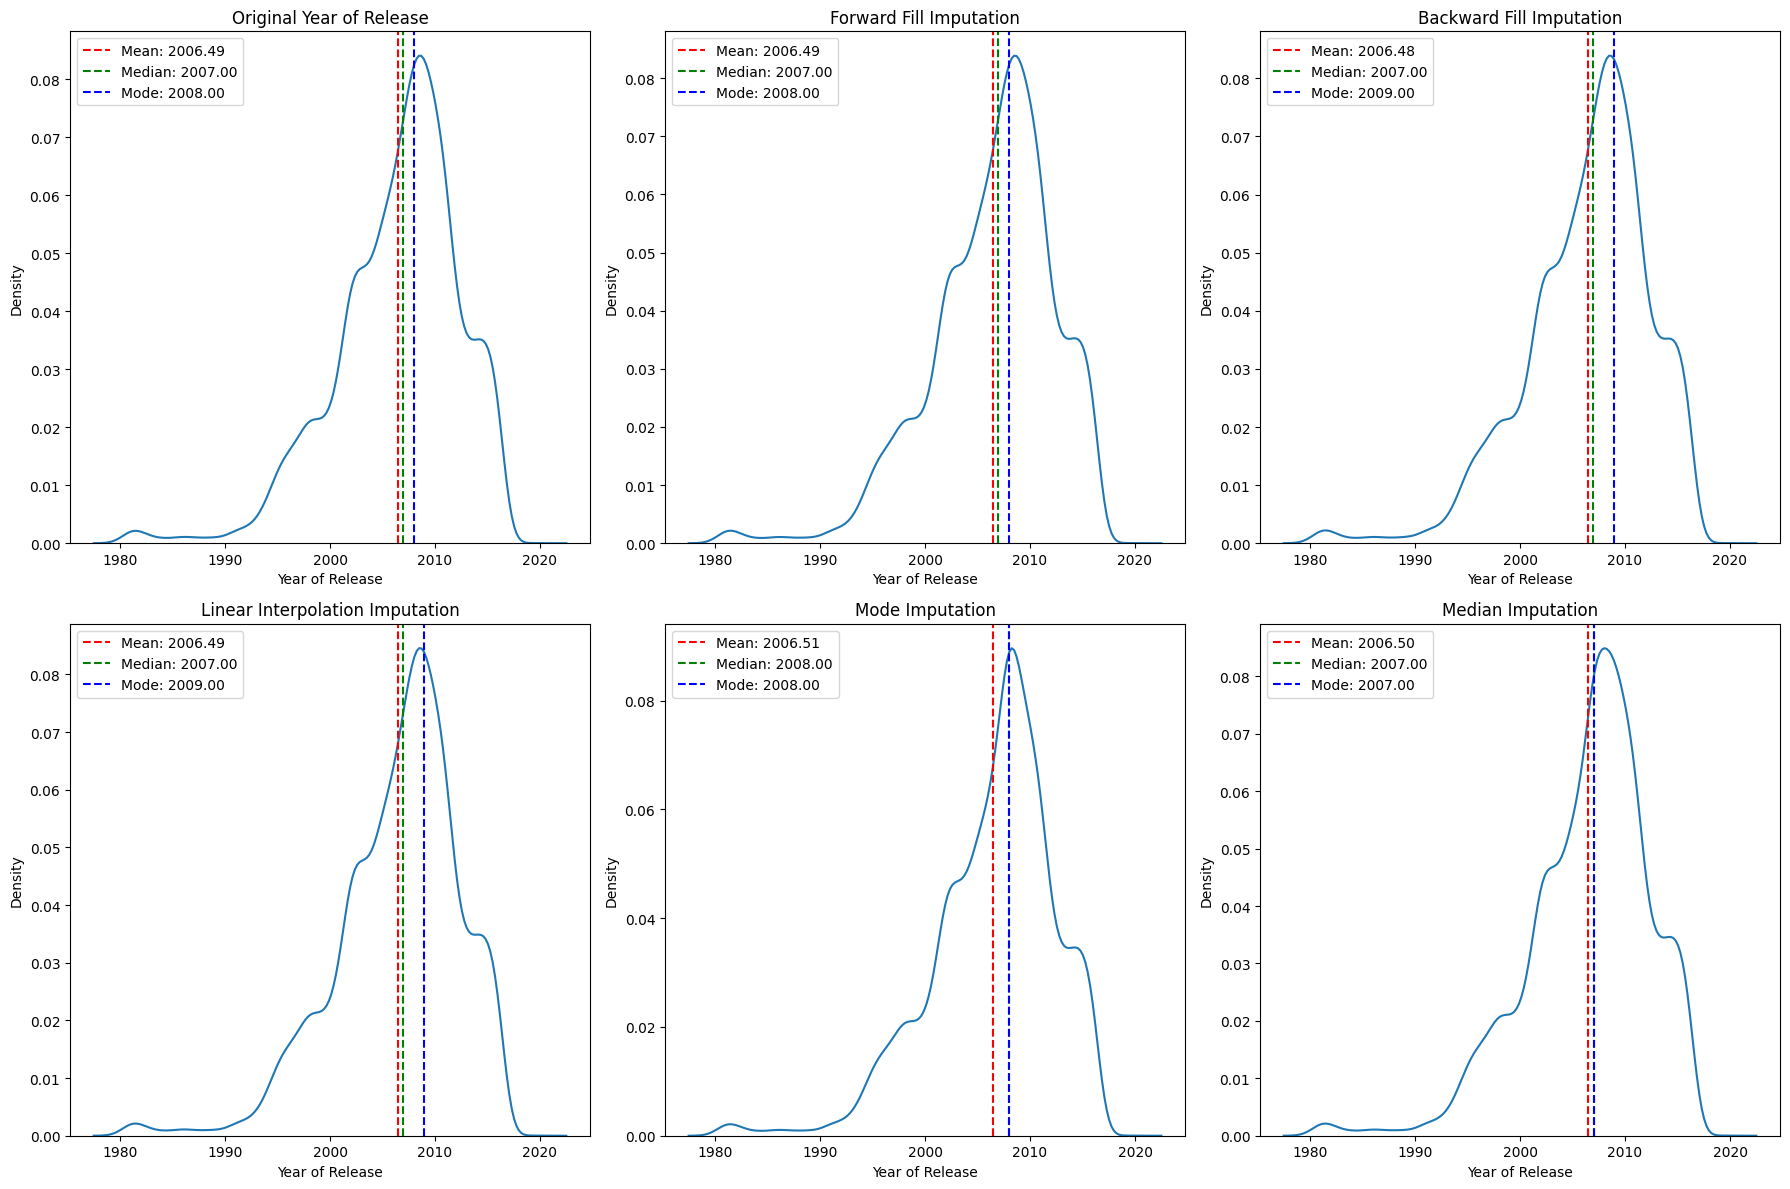

In [8]:
df_missing = df.copy()
df_dropna = df_missing.dropna(subset=['Year_of_Release'])

# Forward Fill
df_missing['year_ffill'] = df_missing['Year_of_Release'].fillna(method='ffill')

# Backward Fill
df_missing['year_bfill'] = df_missing['Year_of_Release'].fillna(method='bfill')

# Linear Interpolation
df_missing['year_interp'] = df_missing['Year_of_Release'].interpolate(method='linear')

# Mode
mode_year = df_missing['Year_of_Release'].mode()[0]
df_missing['year_mode'] = df_missing['Year_of_Release'].fillna(mode_year)

# Median
median_year = df_missing['Year_of_Release'].median()
df_missing['year_median'] = df_missing['Year_of_Release'].fillna(median_year)

# Function for plots
def plot_distribution(data, title, ax):
    sns.distplot(data, hist=False, kde=True, ax=ax)
    
    mean_year = data.mean()
    median_year = data.median()
    mode_year = data.mode()[0]
    
    ax.axvline(mean_year, color='r', linestyle='--', label=f'Mean: {mean_year:.2f}')
    ax.axvline(median_year, color='g', linestyle='--', label=f'Median: {median_year:.2f}')
    ax.axvline(mode_year, color='b', linestyle='--', label=f'Mode: {mode_year:.2f}')
    
    ax.set_title(title)
    ax.set_xlabel('Year of Release')
    ax.set_ylabel('Density')
    ax.legend()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes = axes.flatten()

# Original Data
plot_distribution(df_dropna['Year_of_Release'], 'Original Year of Release', axes[0])

# Forward Fill
plot_distribution(df_missing['year_ffill'], 'Forward Fill Imputation', axes[1])

# Backward Fill
plot_distribution(df_missing['year_bfill'], 'Backward Fill Imputation', axes[2])

# Linear Interpolation
plot_distribution(df_missing['year_interp'], 'Linear Interpolation Imputation', axes[3])

#  Mode Fill
plot_distribution(df_missing['year_mode'], 'Mode Imputation', axes[4])

#  Median Fill
plot_distribution(df_missing['year_median'], 'Median Imputation', axes[5])

plt.tight_layout()
plt.show();

In [9]:
df_task2 = df.copy()
df_task2['Year_of_Release'] = df_task2['Year_of_Release'].fillna(method='ffill')
df_task2.shape

(16719, 16)

In [10]:
df_task2 = df_task2[(df_task2['Year_of_Release'] >= 2010) & (df_task2['Year_of_Release'] <= 2014)]
df_task2.shape

(4238, 16)

In [11]:
df_task2=df_task2[['NA_Sales', 'JP_Sales']]
df_task2.shape

(4238, 2)

## Task 2: Final Visual

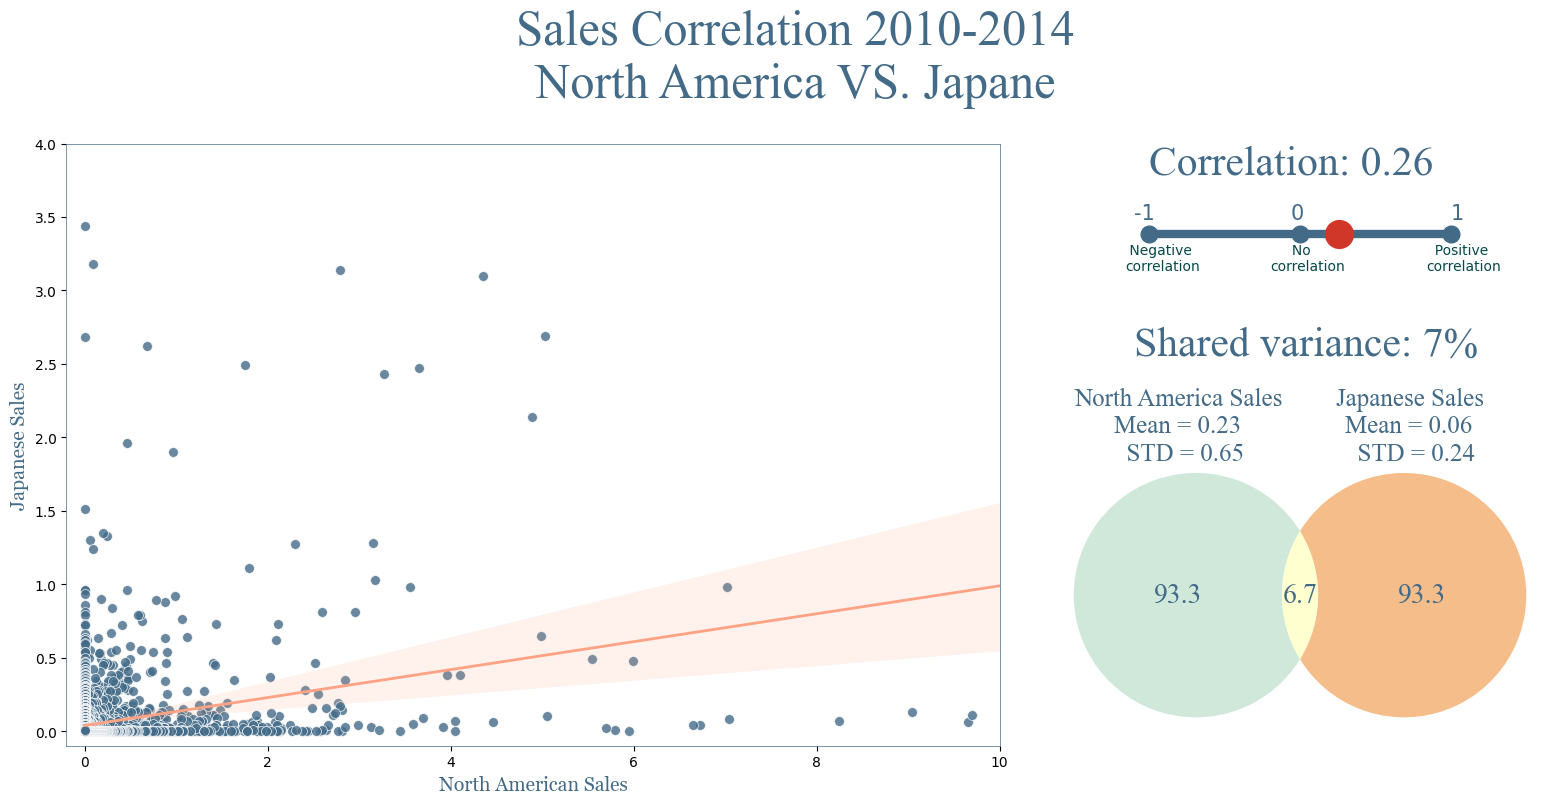

In [12]:
# ------------------Data-----------------------------

# means and SD
mean_na = df_task2['NA_Sales'].mean()
mean_jp = df_task2['JP_Sales'].mean()
std_na = df_task2['NA_Sales'].std()
std_jp = df_task2['JP_Sales'].std()

# linear regression
X = df_task2[['NA_Sales']]
y = df_task2['JP_Sales']
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
r_squared = r2_score(y, y_pred)

fig = plt.figure(figsize=(16, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[2, 1.2])

# ____________________CORR PLOT___________________

ax0 = plt.subplot(gs[0])

# corr plot
sns.scatterplot(x='NA_Sales', y='JP_Sales', data=df_task2, color='#436b88', s=50, alpha=0.8, ax=ax0)

# regression 
sns.regplot(x='NA_Sales', y='JP_Sales', data=df_task2, scatter=False, color='#FFA384', line_kws={"linewidth": 2}, ax=ax0)

ax0.set_xlim(-0.2, 10)
ax0.set_ylim(-0.1, 4)

ax0.set_36b88', family='Georgia')


for spine in ax0.spines.values():
    spine.set_linewidth(0.5)
    spine.set_color('#436b88')  
    

# _______________ VENN PLOT ___________________

ax1 = plt.subplot(gs[1])

# position of the venn plot
ax1.set_position([0.58, 0.2, 0.35, 0.55]) 

subset1 = round(100 - r_squared * 100, 1)  
subset2 = round(100 - r_squared * 100, 1)  
shared_subset = round(r_squared * 100, 1)  

venn = venn2(subsets=(subset1, subset2, shared_subset),  
             set_labels=('', ''), 
             set_colors=('#b0dac2', '#ee923c'),
             alpha=0.6, ax=ax1)



for text in venn.subset_labels:  
    if text:
        text.set_fontsize(20) 
        text.set_color('#436b88')  # Set font color
        text.set_fontfamily('Times New Roman') 

# __________________ CORR BAR _______________
correlation = df_task2['NA_Sales'].corr(df_task2['JP_Sales'])

ax1.plot([-0.5, 0.5], [1.2, 1.2], color='#436b88', linewidth=6, solid_capstyle='round') 
ax1.plot(correlation / 2, 1.2, 'o', color='#d13728', markersize=20)  
ax1.plot(-0.5, 1.2, 'o', color='#436b88', markersize=12) 
ax1.plot(0.5, 1.2, 'o', color='#436b88', markersize=12) 
ax1.plot(0, 1.2, 'o', color='#436b88', markersize=12) 

ax1.set_ylim(-0.5, 1.5) 

ax1.text(-0.03, 1.25, f"0", fontsize=15, color='#436b88')
ax1.text(-0.55, 1.25, f"-1", fontsize=15, color='#436b88')
ax1.text(0.5, 1.25, f"1", fontsize=15, color='#436b88')xlabel('North American Sales', fontsize=14, color='#436b88', family='Georgia')
ax0.set_ylabel('Japanese Sales', fontsize=14, color='#4

ax1.text(-0.58, 1.08, f" Negative \ncorrelation", fontsize=10, color='#07484A')
ax1.text(0.42, 1.08, f"  Positive \ncorrelation", fontsize=10, color='#07484A')
ax1.text(-0.1, 1.08, f"     No \ncorrelation", fontsize=10, color='#07484A')

ax1.text(-0.5, 1.4, f"Correlation: {correlation:.2f}", fontsize=30, color='#436b88',family='Times New Roman')
ax1.text(-0.55, 0.8, f"Shared variance: {r_squared*100:.0f}%", fontsize=30, color='#436b88',family='Times New Roman')
ax1.text(-0.75, 0.63, f"North America Sales", fontsize=18, color='#436b88',family='Times New Roman')
ax1.text(-0.7, 0.45, f"    Mean = {mean_na:.2f}\n      STD = {std_na:.2f}", fontsize=18, color='#436b88',family='Times New Roman')
ax1.text(0.12, 0.63, f"Japanese Sales", fontsize=18, color='#436b88',family='Times New Roman')
ax1.text(0.15, 0.45, f"Mean = {mean_jp:.2f}\n  STD = {std_jp:.2f}", fontsize=18, color='#436b88',family='Times New Roman')

ax1.spines['top'].set_visible(False)

## Remove right line
ax1.spines['right'].set_visible(False)


plt.suptitle(f" Sales Correlation 2010-2014 \n North America VS. Japane ", fontsize=35,color='#436b88',family='Times New Roman', y=1)


# Show the plot
plt.tight_layout()
plt.show()

## Data displaied

Correlation can be quite a challenging concept to display. Not only because it does not represent a value that can be easily associated with a real object, but also because there is a risk of confusing correlation with causation when a correlation takes place.

Following the previously discussed visualisation methods, we aimed to place objects that help the viewer associate numbers with reality. We also structured the information into three layers, where each layer provides progressively more technical detail.

#### First Layer

This layer simply presents the Pearson correlation score, along with a bar to help the viewer visually associate the score with a scale.

#### Second Layer

In the second layer, we introduce the concept of shared variance. This slightly more advanced idea describes how much of the data can be explained by the regression line. In this case, a shared variance of 7% means that only 7% of the variation in one feature can be explained by the variation in the other feature.

#### Third Layer

For the third layer, we present a scatter plot along with the regression line.

## Visual techniques explanation

#### Colours

We try to stick to a consistent colour palette across our visuals. In this case, red was used to highlight specific metrics, helping the viewer get familiar with the data more easily. The red point on the bar, along with the bar itself, is designed to quickly and clearly answer the key question about correlation.

#### Venn Plot

The Venn plot serves as a character or object whose importance in understanding the data we discussed earlier. I believe this plot effectively visualises the relationships between the variables, providing insight into their shared and unique characteristics.

#### Font Size

For this task, we had to change the usual font size ratio we typically follow. Here, we used a (35/30/18) ratio for the font sizes (Title/Subtitle/Text). The subtitles, Correlation Score and Shared Variance are slightly larger than usual to ensure the viewer can quickly capture this important information.

#### Element Size and Position

I decided to dedicate 60-70% of the total chart space to the scatter plot for several reasons:

- Scatter plots require a larger area to be effective because patterns, particularly those related to density, may not be visible if the plot is too small.
- Domain experts are likely to find small scatter plot useful in detecting patterns that may not be immediately visible, so it's important to display the data as clearly and accurately as possible.
- The other elements in the chart are already readable, so reducing the scatter plot's size would only decrease its clarity.
  
Ideally, the correlation score with its bar should be positioned in the top left, where the viewer's eye typically lands first. However, this might create readability issues, as the Japanese sales Y axis would be too close to both the Venn plot and the correlation section. I tested switching the scatter plot and the Venn plot, but the current composition seems to be the most optimal solution.

#### Lines and Frames

I decided to keep the entire frame around the scatter plot because it helps visually isolate the plot, especially considering that the data points don't follow a specific pattern. However, I reduced the frame's line width to 0.5, which still provides a sense of isolation while being less distracting for the viewer.

# Task 3: Top 4 Genres

## Task 3: Final Visual

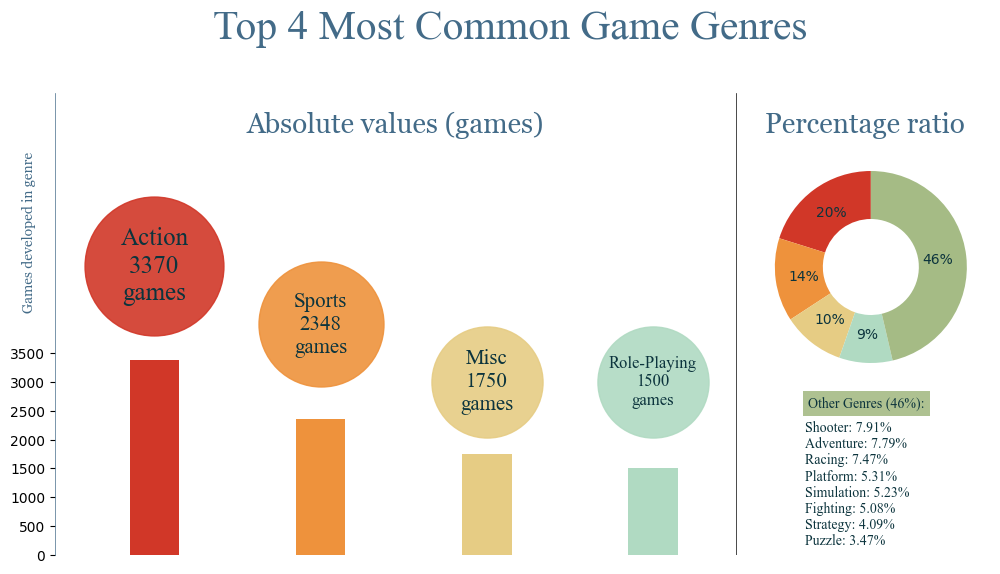

In [13]:
# -----------------Data------------------------

genre_counts = df['Genre'].value_counts().nlargest(4)
## Get the top 4 most common genres
top_4_genres = df['Genre'].value_counts().nlargest(4)

## Calculate the sum of all other genres
total_genre_count = df['Genre'].value_counts().sum()
other_genres = df['Genre'].value_counts().drop(top_4_genres.index) 

# Calculate percentages for other genres
other_genres_percentage = (other_genres / total_genre_count) * 100
other_genres_count = other_genres.sum()

# ----------------Positions--------------------

# Set levels for each bubble on Y axis
circle_y_positions = {0: 5000,1: 4000,2: 3000, 3: 3000}

# ----------------Sizes and colours-----------------------

# Set sizes and colour for bubbles + font size for text inside of the bubbles
circle_properties = {
    0: {'size': 100, 'color': '#d13728', 'fontsize': 18},
    1: {'size': 90, 'color': '#ee923c', 'fontsize': 15},
    2: {'size': 80, 'color': '#e6cc84', 'fontsize': 15},
    3: {'size': 80, 'color': '#b0dac2', 'fontsize': 12}
}


# -----------------Create bar plot------------------------
## Initiate plot space
fig, ax = plt.subplots(figsize=(12, 6))
## Create var with plot basic properties: data / method applied (.plot) / type of plot / axis / colours / bars sizes
bars = top_4_genres.plot(kind='bar', ax=ax, color=['#d13728', '#ee923c', '#e6cc84', '#b0dac2'], width=0.3)

## Add title and labels (X label is set empty for reducing unnecessary info)
plt.title('Top 4 Most Common Game Genres', fontsize=30, color='#436b88',family='Times New Roman', x=0.49, y=1.1)
plt.xlabel('')
plt.ylabel('Games developed in genre', color='#436b88',family='Georgia')

# ---------------Plotting left part (Absolute values) -------------------

## Loop through each bar and annotate with a custom bubble and the genre name + count inside
for i, (bar, genre) in enumerate(zip(bars.patches, top_4_genres.index)):
## Set circle position on the Y axis
    circle_x = bar.get_x() + bar.get_width() / 2
    circle_y = circle_y_positions[i]

## Set sizes and colours
    circle_size = circle_properties[i]['size']
    circle_color = circle_properties[i]['color']

## Plot a bubble above each bar
    plt.plot(circle_x, circle_y, 'o', color=circle_color, markersize=circle_size, alpha = 0.9)

## Add tgenre name and games count
    count = top_4_genres[genre] 
    plt.text(circle_x, circle_y, f"{genre}\n{count}\ngames", fontsize=circle_properties[i]['fontsize'], va='center', ha='center', color='#0c343d', family='Times New Roman')

# -----------------Right part (Precentage)------------------

## Set params for donut chart
labels = list(top_4_genres.index) + ['Other Genres']
sizes = list(top_4_genres.values) + [other_genres_count]
colors = ['#d13728', '#ee923c', '#e6cc84', '#b0dac2', '#a5bb85']

## Set params for the list with other genres
text_position = [0.75, 0.1]  
other_genres_text = "\n" 
for genre, percentage in other_genres_percentage.items():
    other_genres_text += f"{genre}: {percentage:.2f}%\n" 

## Plot list with other genres
plt.figtext(text_position[0], text_position[1], other_genres_text, fontsize=10, color='#0c343d', family='Times New Roman')

## Set additional params for donut chart
ax_donut = fig.add_axes([0.68, 0.39, 0.25, 0.4]) 
wedges, texts, autotexts = ax_donut.pie(sizes, labels=None,  colors=colors, wedgeprops={'width': 0.5}, startangle=90, autopct='%1.0f%%', pctdistance=0.7)

## Set params for values in the donut chart
for autotext in autotexts:
    autotext.set_color('#0c343d')  
    autotext.set_fontsize(10)    

# ----------------Plot properties-------------------

ax.yaxis.set_label_coords(-0.02, 0.7) 

## Set values for Y-axis
ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500])

## Set limit for Y axis, set extra space for bubbles 
ax.set_ylim(0, 8000)

## Set limit for X axis, set extra space for donut chart
ax.set_xlim(-0.6, 5)

## remove X labels
ax.set_xticks([])

# Remove the frame except Y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

## Set colour for Y axis
ax.spines['left'].set_color('#436b88')  
## Set width for Yaxis
ax.spines['left'].set_linewidth(0.5)

## Additional line separating plots
ax.axvline(x=3.5, color='black', linestyle='-', linewidth=0.5)

## Create a box for referening donut plot 
plt.text(0.81, 0.32, "Other Genres (46%):", transform=ax.transAxes, fontsize=10, color='#0c343d', family='Times New Roman', bbox=dict(facecolor='#a5bb85', alpha=0.9, edgecolor='none'))

## add subtiteles for each section
plt.text(-1.1, 1.4, 'Percentage ratio', fontsize=20, color='#436b88', family='Georgia')
plt.text(-6.5, 1.4, 'Absolute values (games)', fontsize=20, color='#436b88', family='Georgia')
plt.show()


## Data displaied

In this plot, we were tasked with displaying the top 4 genres. However, before doing so, we needed to define what metric we would use to represent popularity. In this dataset, we have several features that could serve this purpose:

- Sales figures: We could use one of the sales-related features to associate each genre with a total sales figure.
- User count/rating: Another option is to use the number of users who purchased games in a specific genre.
- Genre count: Alternatively, we could use the genre column itself and apply a value count method to determine how many games are associated with each genre.
  
Following the approach used in the first task, we combined bubble and bar plots to provide an overview of the distribution of absolute values. Additionally, I decided to include a donut chart to provide context for the top 4 genres within the entire population.

Initially, I considered displaying data for the other genres as a bar as well, but all variations made the plot confusing. An accumulated or stacked bar would be more than twice the height of the top genre, potentially causing misinterpretation. Displaying other genres separately also was not a good option, as it would take the majority of the space on the plot, even with reduced size.

## Visual techniques explanation

#### Font

We use "Times New Roman," a member of the serif font family. Another similar serif font used across all visuals is "Georgia," which I prefer more. However, "Georgia" displays digits erratically, so I decided to keep it for titles that do not include numbers.

I could not find a unanimous answer to the question, "Which font is the most popular or effective for data visualisation?" However, all the resources I reviewed agree that the font should match the context of the content. Painter et al. (2021), in their guidelines for data visualisation, provide excellent examples of rational font use. Similarly, a study by Atz et al. (2014) summarised best practices for visualisation, helping us determine the most appropriate font choices for our visuals.

#### Colours

We keep a consistent colour palette across all our visuals. A detailed explanation of this can be found in the Task 1 section. For this particular visual, I used a "Hot to Cold" colour palette to associate decreasing values with colder colours. Additionally, we introduced a sixth colour, '#0c343d' (kind of green), to represent "Other Genres" in the donut chart. The same green was used in the extended legend for consistency.

#### Legend

The original legend was removed because it duplicated information that was already clear in the plot. The bubbles effectively serve as both the data markers and the legend, making the legend unnecessary.

#### Font size

Although I try to use consistent font sizes across all visuals, slight adjustments were made in response to the specific layout of this plot to adjust readability. In this plot, I followed a ratio of 30/20/10 for the font sizes (Title/Subtitle/Text), ensuring a clear hierarchy.

#### Elements size

In my opinion, visuals should include enough empty space to allow viewers to focus on key points without distractions. Therefore, the size of elements was adjusted to meet this requirement. I also aligned  the width of the bars with the donut chart to make it easier for viewers to associate percentages with absolute values.

#### Lines and Frames

Most of the original frame was removed to create more white space, except for the Y-axis, which contains important numerical data. Additionally, I included a vertical line to separate the two plots, providing clearer structure and visual separation.

# Task 4: EU Sales before and after 2005

## Task 4: Final Visual

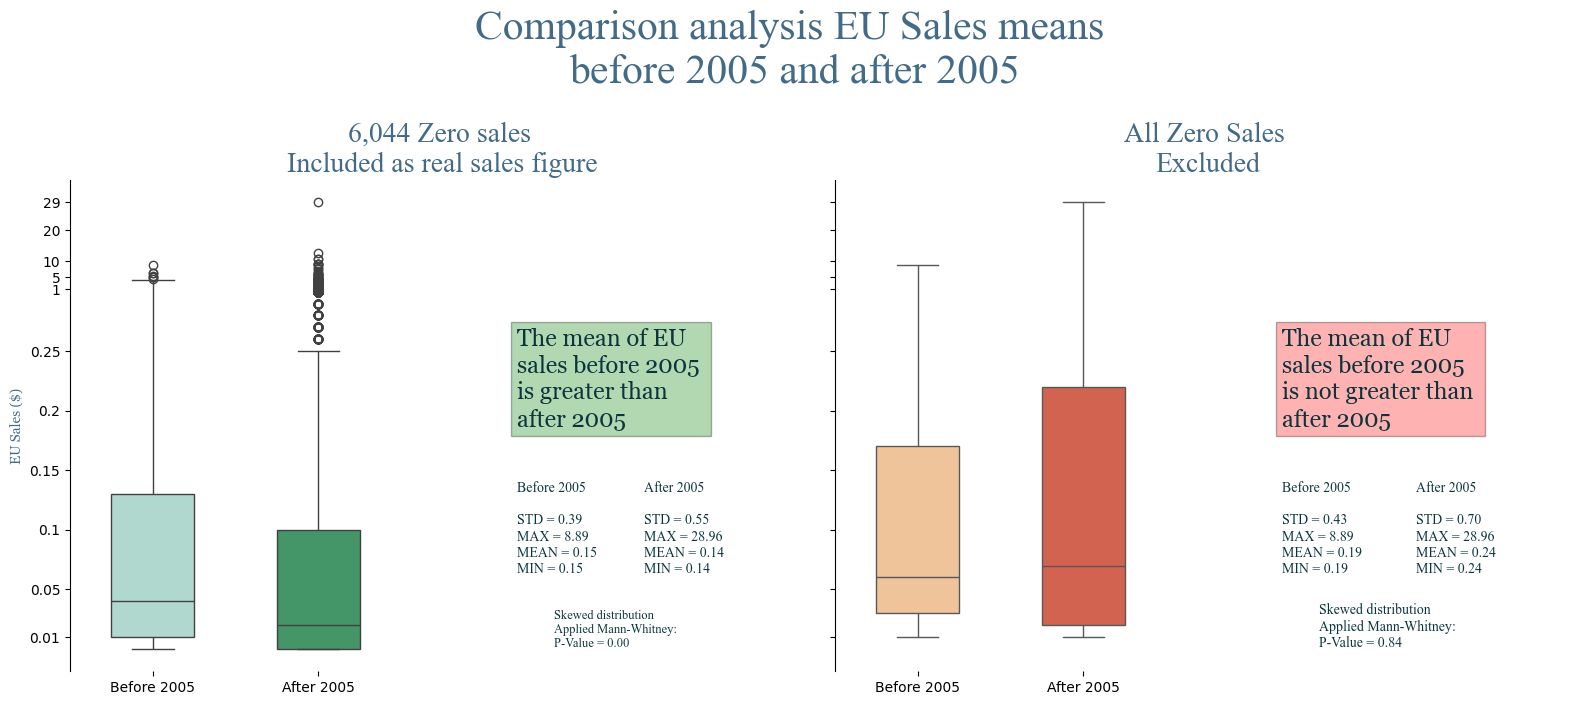

In [14]:
# --------------Functions------------------------

## Adapt scale in boxplot to handle outliers 
### define a function and set input values x(scale values) and threshold (base level which we want use as a trigger for tranformation)
def custom_transform(x, threshold=0.30):
### If the value smaller or equal -> apply tranformation 1 (slightly increace the x value) stretch out the scale
    if x <= threshold:
        return x / threshold * 0.8  
### Otherwise -> apply transformation 2 (decrease the x value) compress the scale
    else:
        return 0.8 + (1 - 0.8) * (x - threshold) / (29 - threshold)  

# -------------Data-------------------------------------
## Insolate plot results by getting original df
df = pd.read_csv('vgsales.csv')

## Split df into before 2005 and after 2005
df_task4_before_2005 = df[df['Year_of_Release'] < 2005]
df_task4_after_2005 = df[df['Year_of_Release'] >= 2005]

## Get only sales which greater than 0
df_task4_before_2005_no_zeros = df_task4_before_2005[df_task4_before_2005['EU_Sales'] != 0]
df_task4_after_2005_no_zeros = df_task4_after_2005[df_task4_after_2005['EU_Sales'] != 0]

## Data (including zero sales)
data_before_with_zeros = df_task4_before_2005['EU_Sales']
data_after_with_zeros = df_task4_after_2005['EU_Sales']

## Data (excluding zero sales)
data_before_no_zeros = df_task4_before_2005_no_zeros['EU_Sales']
data_after_no_zeros = df_task4_after_2005_no_zeros['EU_Sales']

## Get metrics for plots

### For left boxplots std.:standart deviation / max.: the biggest value / mean.: mean / min.: smallest
std_left_before = df_task4_before_2005['EU_Sales'].std()
std_left_after = df_task4_after_2005['EU_Sales'].std()
max_left_before = df_task4_before_2005['EU_Sales'].max()
max_left_after = df_task4_after_2005['EU_Sales'].max()
mean_left_before = df_task4_before_2005['EU_Sales'].mean()
mean_left_after = df_task4_after_2005['EU_Sales'].mean()
min_left_before = df_task4_before_2005['EU_Sales'].min()
min_left_after = df_task4_after_2005['EU_Sales'].min()

### For right boxplots
std_right_before = df_task4_before_2005_no_zeros['EU_Sales'].std()
std_right_after = df_task4_after_2005_no_zeros['EU_Sales'].std()
max_right_before = df_task4_before_2005_no_zeros['EU_Sales'].max()
max_right_after = df_task4_after_2005_no_zeros['EU_Sales'].max()
mean_right_before = df_task4_before_2005_no_zeros['EU_Sales'].mean()
mean_right_after = df_task4_after_2005_no_zeros['EU_Sales'].mean()
min_right_before = df_task4_before_2005_no_zeros['EU_Sales'].min()
min_right_after = df_task4_after_2005_no_zeros['EU_Sales'].min()

### Packing texts and metrics into boxes, set 2 decidal digits (.2f)
stat_left_before = f"Before 2005 \n\nSTD = {std_left_before:.2f} \nMAX = {max_left_before:.2f} \nMEAN = {mean_left_before:.2f} \nMIN = {mean_left_before:.2f}"
stat_left_after =  f"After 2005 \n\nSTD = {std_left_after:.2f} \nMAX = {max_left_after:.2f} \nMEAN = {mean_left_after:.2f} \nMIN = {mean_left_after:.2f}"
stat_right_before =  f"Before 2005 \n\nSTD = {std_right_before:.2f} \nMAX = {max_right_before:.2f} \nMEAN = {mean_right_before:.2f} \nMIN = {mean_right_before:.2f}"
stat_right_after =  f"After 2005 \n\nSTD = {std_right_after:.2f} \nMAX = {max_right_after:.2f} \nMEAN = {mean_right_after:.2f} \nMIN = {mean_right_after:.2f}"

# Apply function to 4 boxplots
transformed_before_with_zeros = np.array([custom_transform(x) for x in data_before_with_zeros])
transformed_after_with_zeros = np.array([custom_transform(x) for x in data_after_with_zeros])
transformed_before_no_zeros = np.array([custom_transform(x) for x in data_before_no_zeros])
transformed_after_no_zeros = np.array([custom_transform(x) for x in data_after_no_zeros])

# Combine datasets
df_with_zeros = pd.DataFrame({
    'Transformed EU Sales': np.concatenate([transformed_before_with_zeros, transformed_after_with_zeros]),
    'Time Period': ['Before 2005'] * len(transformed_before_with_zeros) + ['After 2005'] * len(transformed_after_with_zeros)
})

df_no_zeros = pd.DataFrame({
    'Transformed EU Sales': np.concatenate([transformed_before_no_zeros, transformed_after_no_zeros]),
    'Time Period': ['Before 2005'] * len(transformed_before_no_zeros) + ['After 2005'] * len(transformed_after_no_zeros)
})

#----------------Box Plots------------------------------------

## Create 2 subplots and as 2 columns and 1 row
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

##  Plot Box plots with zero sales included
### seaborn boxplot: Y:-traformed values stored in combined dfs
###                  X:-2 transformed dfs stored in combined dfs
###                  data: Combined df prepared in previos section
###                  ax: define which side (half) of the plot [0]-left, [1]-right
###                  palette: 'BuGn'- light green + green / 'OrRd' - orange + red
###                  width: boxes width
sns.boxplot(y='Transformed EU Sales', x='Time Period', data=df_with_zeros, ax=axes[0], palette='BuGn', width=0.5)

## Set tittle + Labels:            -> Text                           -> Font size  -> Font colour  ->Font type
axes[0].set_title('6,044 Zero sales \nIncluded as real sales figure', fontsize=20, color='#436b88',family='Times New Roman')
axes[0].set_ylabel('EU Sales ($)', color='#436b88',family='Georgia')
axes[0].set_xlabel('') 

# Plot Box plots without zero sales
sns.boxplot(y='Transformed EU Sales', x='Time Period', data=df_no_zeros, ax=axes[1], palette='OrRd', width=0.5)
axes[1].set_title('All Zero Sales \nExcluded', fontsize=20, color='#436b88',family='Times New Roman')
axes[1].set_xlabel('')  

# ----------------- Y-Axis change ---------------------
## Set values for Y axis
original_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 1, 5, 10, 20, 29]

## Apply custom function to values in Y-axis
transformed_ticks = [custom_transform(x) for x in original_values]

## Display transformed values
for ax in axes.flat:
    ax.set_yticks(transformed_ticks)
    ax.set_yticklabels(original_values)

# Add space for each subplot
for ax in axes:
    ax.set_xlim(-0.5, 4) 

# -------------------- Hypothesis Testing ------------------

## Right Boxplots (with zero sales excluded)

### Define data for testing
eu_sales_before_2005 = df_task4_before_2005['EU_Sales']
eu_sales_after_2005 = df_task4_after_2005['EU_Sales']

### Get stat. properties and p-value for testing
stat_before, p_before = stats.shapiro(eu_sales_before_2005)
stat_after, p_after = stats.shapiro(eu_sales_after_2005)

### Define significance level
alpha = 0.05

### If statement 1: If p-values of both dfs (before and after) are greater than alpha
###               Its normal distribution, apply T-testind and store results of testing
###               Otherwise 
###               Distrebution is not normal -> apply Mann Whitney Testing
###               Store testing result
if p_before > alpha and p_after > alpha:
    t_stat, p_value = stats.ttest_ind(eu_sales_before_2005, eu_sales_after_2005, alternative='greater')
    right_result = f"Normal distribution. \nt-test:\nP-Value = {p_value:.2f}"
else:
    t_stat, p_value = stats.mannwhitneyu(eu_sales_before_2005, eu_sales_after_2005, alternative='greater')
    right_result = f"Skewed distribution \nApplied Mann-Whitney:\nP-Value = {p_value:.2f}"

### If statment 2:  If p-value less than significance level
###                 Store as results text 1 and colour 1
###                 Otherwise, Store as results text 2 and colour 2
if p_value < alpha:
    right_result2 = f"The mean of EU \nsales before 2005 \nis greater than \nafter 2005"
    right_result2_colour = "green"
else:
    right_result2 = f"The mean of EU \nsales before 2005 \nis not greater than \nafter 2005"
    right_result2_colour = "red"


## Left Boxplots (with zero sales included)
eu_sales_before_2005 = df_task4_before_2005_no_zeros['EU_Sales']
eu_sales_after_2005 = df_task4_after_2005_no_zeros['EU_Sales']

stat_before, p_before = stats.shapiro(eu_sales_before_2005)
stat_after, p_after = stats.shapiro(eu_sales_after_2005)

if p_before > alpha and p_after > alpha:
    t_stat, p_value = stats.ttest_ind(eu_sales_before_2005, eu_sales_after_2005, alternative='greater')
    left_result = f"Normal distribution. \nt-test:\nP-Value = {p_value:.2f}"
else:
    t_stat, p_value = stats.mannwhitneyu(eu_sales_before_2005, eu_sales_after_2005, alternative='greater')
    left_result = f"Skewed distribution \nApplied Mann-Whitney:\nP-Value = {p_value:.2f}"

if p_value < alpha:
    left_result2 = f"The mean of EU \nsales before 2005 \nis greater than \nafter 2005"
    left_result2_colour = "green"
else:
    left_result2 = f"The mean of EU \nsales before 2005 \nis not greater than \nafter 2005"
    left_result2_colour = "red"

# ---------------Plot properties------------------------

## Display testing result, stats info and info about testing
##/plot/format xy posit.  -> data   -> keep text outside of the boxes -> fontsize -> font colour -> font type
axes[0].text(0.65, 0.05, right_result, transform=axes[0].transAxes, fontsize=9, color='#0c343d',family='Times New Roman')
axes[0].text(0.6, 0.5, right_result2, transform=axes[0].transAxes, fontsize=17, color='#0c343d',family='Georgia', bbox=dict(facecolor=right_result2_colour, alpha=0.3))
axes[0].text(0.6, 0.2, stat_left_before, transform=axes[0].transAxes, fontsize=10, color='#0c343d',family='Times New Roman')
axes[0].text(0.77, 0.2, stat_left_after, transform=axes[0].transAxes, fontsize=10, color='#0c343d',family='Times New Roman')
axes[1].text(0.65, 0.05, left_result, transform=axes[1].transAxes, fontsize=10, color='#0c343d',family='Times New Roman')
axes[1].text(0.6, 0.5, left_result2, transform=axes[1].transAxes, fontsize=17, color='#0c343d',family='Georgia', bbox=dict(facecolor=left_result2_colour, alpha=0.3))
axes[1].text(0.6, 0.2, stat_right_before, transform=axes[1].transAxes, fontsize=10, color='#0c343d',family='Times New Roman')
axes[1].text(0.78, 0.2, stat_right_after, transform=axes[1].transAxes, fontsize=10, color='#0c343d',family='Times New Roman')

## Set general title for both plot
plt.suptitle("Comparison analysis EU Sales means \nbefore 2005 and after 2005", fontsize=30, color='#436b88',family='Times New Roman', y=1, x=0.5) 

## Remove top line
axes[0].spines['top'].set_visible(False)
axes[1].spines['top'].set_visible(False)
## Remove right line
axes[0].spines['right'].set_visible(False)
axes[1].spines['right'].set_visible(False)
## Remove bottom lune
axes[0].spines['bottom'].set_visible(False)
axes[1].spines['bottom'].set_visible(False)

plt.tight_layout()
# Show the plot
plt.show();

## Data displaied

**Zero Sales**

In this visualisation, we faced an obstacle: the 'EU_sales' feature contains zero values. The issue is the uncertainty about the origin of these zeros. There are two possible reasons for the zeros appearing in the dataset:

1. The game was not introduced in the region. If this is the case, we can not include these sales in the analysis because the zeros do not represent real sales data.
2. The game was introduced in the region, but there were no sales. In this scenario, the zeros reflect actual demand and we should include them in the analysis.

Let’s simplify this issue with using an example. Comparing the average daily sales of two stores. If one store did not make any sales for two days, before analysing the data, we need to find out whether the store was open on those days. If it was open, the zero sales should be included, as they fairly represent demand. However, if the store was closed, we should exclude those days from the analysis because they do not represent potential sales.

It is unlikely that a game introduced in a region would have zero sales, but we can not base our analysis on assumptions. Unfortunately, with the data we are given, there is no way to confirm this hypothesis. Therefore, the best approach is to present both versions of the visual: one that includes the zero sales and one that excludes them. While this may make the plot more complex, it will reflect the data accurately and allow experts to decide which interpretation is more valid.

**Sales on Different Scales**

Another challenge we face is dealing with outliers. Both distributions are heavily right-skewed, making it difficult to display all the data on the same scale. We tested different transformation techniques, but methods like log or Box-Cox transformations, while preserving data patterns, changes the original scale, making it harder for viewers to relate the visual to actual numbers. Removing outliers could reduce skewness, but there is risks of losing critical data. In this case, removing outliers would mean excluding top-performing games, which are essential for comparative analysis.

The best solution we arrived at is to adjust the scale. We kept the original scale for data within the standard deviation range and compressed the scale for data outside that range. This approach is like to look at a long road from the driver’s seat providing an overview without losing important details.

**Hypothesis Testing**

We applied hypothesis testing with an automatic selection of the appropriate method based on the data's distribution (normal or skewed) to determine if the difference in mean values is statistically significant. The results of the tests are directly displayed in boxes, which provide an immediate answer to the question posed in CA description.

Additionally, I chose to display basic information about the testing process such as distribution state, testing method, and p-value in a smaller box. This serves as a secondary layer, giving viewers more context about the main plot.

**Box Plots**

Considering that some viewers might not be familiar with box plots, I included an additional box with the test results, as described earlier. However, in this case, the box plot is an effective method for displaying statistical properties. These plots serve as a second layer of information, expanding on the initial message and allowing viewers to extract more detailed insights. I also placed basic statistical properties for each distribution on the side, helping viewers associate box plot elements with specific figures.

## Visual techniques explanation

**Morpheus Approach**
The issue with the data, as I described earlier, forces us to sacrifice some readability in order to display the data fairly and allow viewers with domain expertise to make informed decisions. This is why I split the plot into two parts, each with identical properties but using different datasets—similar to how Morpheus offered Neo two pills, representing two different choices.

**Colours**
Given the challenge we faced, I decided to slightly deviate from our original colour palette by introducing green to clearly distinguish between the two parts of the plot. Rather than assigning a completely separate colour for each plot, I chose two colours for the "After" box plots, and used similar but desaturated (less bright) colours for the "Before" box plots. I applied this same approach to the result boxes.

**Font Size**
Since this plot does not feature large elements like the first task, we were able to apply the standard font sizes used throughout this CA: 30 for the title, 20 for subtitles, and 10 for text. However, we did make slight adjustments to the font sizes of certain elements to improve the overall composition.

**Lines and Frames**
For the frames, I decided to keep only the Y-axis scale to minimise distractions and maintain focus on the data.



# Task 5: Top 3 Developers

## Task 5: Preparation

In [15]:
# Prep dfs
df = pd.read_csv('vgsales.csv')
df_nans = df[df['Developer'].isna()]
df = df[df['Developer'].notna()]


# Contingency tables for both parts of data
contingency_table = pd.crosstab([df['Developer'], df['Platform']], [df['Genre'], df['Publisher']])

# Create a dictionary to map combinations
developer_map = {}

for (developer, platform), row in contingency_table.iterrows():
    for (genre, publisher), value in row.items():
        if value > 0:
            key = (publisher, genre, platform)
            if key not in developer_map:
                developer_map[key] = []
            developer_map[key].append((developer, value))

# Sort by frequency and get the most frequent developer for each combination
for key, developers in developer_map.items():
    developer_map[key] = max(developers, key=lambda x: x[1])[0] 

# Fallback 
fallback_developer = df['Developer'].mode()[0] 

# Impute missing values in df_nans 
def impute_developer(row):
    key = (row['Publisher'], row['Genre'], row['Platform'])
    
    # If the exact combination exists in the map, use it
    if key in developer_map:
        return developer_map[key]
    
    # Fallback to the most frequent Developer for the same Publisher and Genre (ignoring Platform)
    publisher_genre_key = (row['Publisher'], row['Genre'])
    for map_key in developer_map.keys():
        if map_key[:2] == publisher_genre_key:
            return developer_map[map_key]
    
    # Fallback to the most frequent Developer in the entire dataset
    return fallback_developer

df_nans['Developer'] = df_nans.apply(impute_developer, axis=1)

df_combined = pd.concat([df, df_nans])

df_task5 = df_combined.copy()
df_not_missing = df[df['Developer'].notna()] 

## Task 5: Final Visual

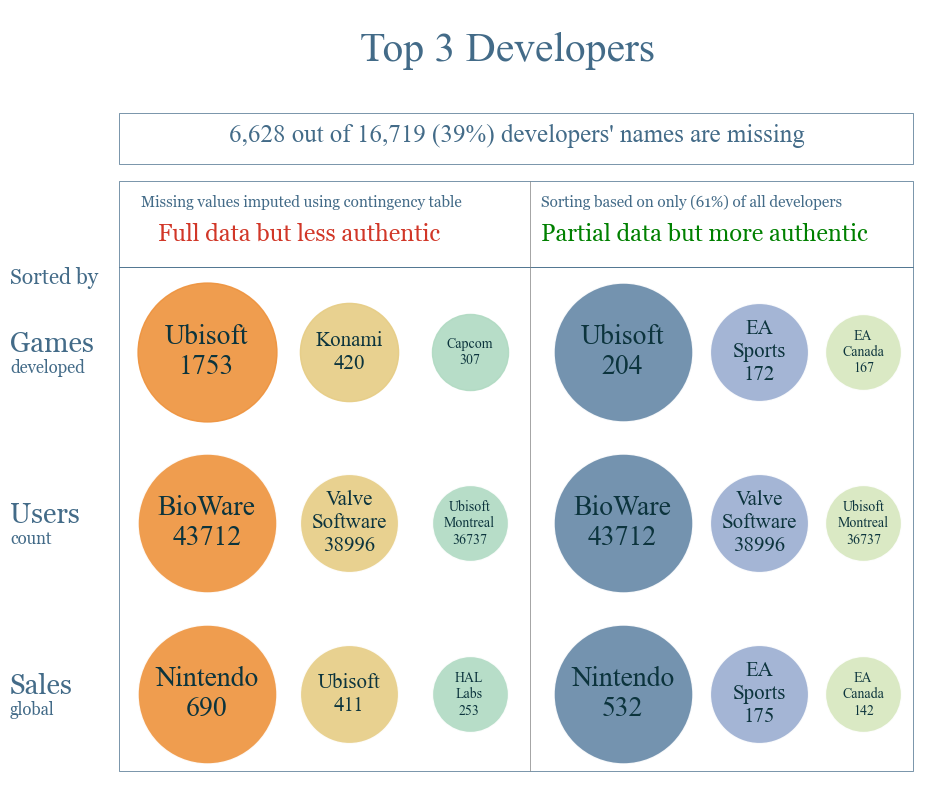

In [16]:
# -------------------Data-----------------------------

## top3 by games launched
top_3_game_developers_task5 = df_task5['Developer'].value_counts().nlargest(3)
top_3_game_developers_not_missing = df_not_missing['Developer'].value_counts().nlargest(3)

## top3 users
top_3_user_count_task5 = df_task5.groupby('Developer')['User_Count'].sum().nlargest(3)
top_3_user_count_not_missing = df_not_missing.groupby('Developer')['User_Count'].sum().nlargest(3)

## top3 global sales
top_3_global_sales_task5 = df_task5.groupby('Developer')['Global_Sales'].sum().nlargest(3)
top_3_global_sales_not_missing = df_not_missing.groupby('Developer')['Global_Sales'].sum().nlargest(3)

# ------------------Sizes-----------------------

## Set the same sizes for each trio
bubble_sizes = [10000, 5000, 3000] 

## Font size for dame names and figures 
font_size = [20, 15, 10] 

# -----------------Colours-----------------------

## Set colours for left bubbles
bubbles_colours = ['#ee923c', '#e6cc84', '#b0dac2']

## Set colours for right bubbles
bubbles_colours_right = ['#6587a6', '#9aadd1', '#d6e7be']

# ------------------Positions------------------

## Set X position for left bubbles
bubble_positions = [-0.2, 1.1, 2.2] 

## Set X position for right bubbles 
bubble_positions_right = [3.6, 4.85, 5.8] 


fig, ax = plt.subplots(figsize=(12, 10))

# ------------Labels------------------

## Set all additional texts 
###   XY positions / text / font size  /   colour / font
ax.text(-2, 1.4, "Sorted by", fontsize=15, color='#436b88',family='Georgia')
ax.text(-2, 1, "Games", fontsize=20, color='#436b88',family='Georgia')
ax.text(-2, 0.88, "developed", fontsize=12, color='#436b88',family='Georgia')
ax.text(-2, 0, "Users", fontsize=20, color='#436b88',family='Georgia')
ax.text(-2, -0.12, "count", fontsize=12, color='#436b88',family='Georgia')
ax.text(-2, -1, "Sales", fontsize=20, color='#436b88',family='Georgia')
ax.text(-2, -1.12, "global", fontsize=12, color='#436b88',family='Georgia')
ax.text(1.2, 2.7, "Top 3 Developers", fontsize=30, color='#436b88',family='Times New Roman')
ax.text(0, 2.23, "6,628 out of 16,719 (39%) developers' names are missing", fontsize=18, color='#436b88',family='Times New Roman')
ax.text(-0.8, 1.85, "Missing values imputed using contingency table", fontsize=11, color='#436b88',family='Georgia')
ax.text(-0.65, 1.65, "Full data but less authentic", fontsize=17, color='#d13728',family='Georgia')
ax.text(2.85, 1.85, "Sorting based on only (61%) of all developers", fontsize=11, color='#436b88',family='Georgia')
ax.text(2.85, 1.65, "Partial data but more authentic", fontsize=17, color='green',family='Georgia')

# ----------Frames--------------------

## Set frames for additional info
rect = patches.Rectangle((-1, 1.5), 7.25, 0.5, linewidth=0.5, edgecolor='#436b88', facecolor='none', linestyle='-')
ax.add_patch(rect)
rect = patches.Rectangle((-1, 2.1), 7.25, 0.3, linewidth=0.5, edgecolor='#436b88', facecolor='none', linestyle='-')
ax.add_patch(rect)
rect = patches.Rectangle((-1, -1.45), 7.25, 2.95, linewidth=0.5, edgecolor='#436b88', facecolor='none', linestyle='-')
ax.add_patch(rect)

## Set line separating two dfs
ax.vlines(x=2.75, ymin=-1.45, ymax=2, color='gray', linestyle='-', linewidth=0.5)

# -----------------Plotting loops-------------

##  Left by games 
##     indexes
for i, (dev, count) in enumerate(top_3_game_developers_task5.items()):
##  split name inro two/more rows
    dev_name_with_newlines = "\n".join(dev.split())
## display bubbles x position    y pos.    sizes                colours            transparency 
    ax.scatter(bubble_positions[i], 1, s=bubble_sizes[i], color=bubbles_colours[i], alpha=0.9)
## display dev names + figure xy pos.     splitted names         figure         font size         horiz. vert. alig.          colour          font
    ax.text(bubble_positions[i], 1, f"{dev_name_with_newlines}\n{count}", fontsize=font_size[i], ha='center', va='center', color='#0c343d',family='Times New Roman')


## Left total users
for i, (dev, user_count) in enumerate(top_3_user_count_task5.items()):
    dev_name_with_newlines = "\n".join(dev.split())
    ax.scatter(bubble_positions[i], 0, s=bubble_sizes[i], color=bubbles_colours[i], alpha=0.9, edgecolor="w")
    ax.text(bubble_positions[i], 0, f"{dev_name_with_newlines}\n{round(user_count)}", fontsize=font_size[i], ha='center', va='center', color='#0c343d',family='Times New Roman')


## Left total global sales 
for i, (dev, sales) in enumerate(top_3_global_sales_task5.items()):
    dev_name_with_newlines = "\n".join(dev.split())
    ax.scatter(bubble_positions[i], -1, s=bubble_sizes[i], color=bubbles_colours[i], alpha=0.9, edgecolor="w")
    ax.text(bubble_positions[i], -1, f"{dev_name_with_newlines}\n{round(sales)}", fontsize=font_size[i], ha='center', va='center', color='#0c343d',family='Times New Roman')


## Left by games
for i, (dev, count) in enumerate(top_3_game_developers_not_missing.items()):
    dev_name_with_newlines = "\n".join(dev.split())
    ax.scatter(bubble_positions_right[i], 1, s=bubble_sizes[i], color=bubbles_colours_right[i], alpha=0.9, edgecolor="w")
    ax.text(bubble_positions_right[i], 1 , f"{dev_name_with_newlines}\n{count}", fontsize=font_size[i], ha='center', va='center', color='#0c343d',family='Times New Roman')


## Left by user count
for i, (dev, user_count) in enumerate(top_3_user_count_not_missing.items()):
    dev_name_with_newlines = "\n".join(dev.split())
    ax.scatter(bubble_positions_right[i], 0, s=bubble_sizes[i], color=bubbles_colours_right[i], alpha=0.9, edgecolor="w")
    ax.text(bubble_positions_right[i], 0, f"{dev_name_with_newlines}\n{round(user_count)}", fontsize=font_size[i], ha='center', va='center', color='#0c343d',family='Times New Roman')


## Left by total global sales
for i, (dev, sales) in enumerate(top_3_global_sales_not_missing.items()):
    dev_name_with_newlines = "\n".join(dev.split())
    ax.scatter(bubble_positions_right[i], -1, s=bubble_sizes[i], color=bubbles_colours_right[i], alpha=0.9, edgecolor="w")
    ax.text(bubble_positions_right[i], -1, f"{dev_name_with_newlines}\n{round(sales)}", fontsize=font_size[i], ha='center', va='center', color='#0c343d',family='Times New Roman')

# ------------Plot parameters-----------------

## set limits for XY axis
ax.set_xlim(-2, 6.5)
ax.set_ylim(-1.5, 3)

## remove labels
ax.set_xticks([]) 
ax.set_yticks([]) 

## remove original frame
ax.set_frame_on(False) 

## display plot
plt.show()


## Data displaied

### Missing Values
In this task, we faced a similar problem to the previous task, but this time we are missing 40% of our data.

One approach we used was simply to drop all NaNs and sort the remaining 60%. However, this approach is not very robust because the missing 40% could potentially contain top performers. For example, if we select only 60% of all Olympic athletes who are ready to compete, it's very unlikely that the winners will be truly representative.

To address this issue, we turned to the second part of our visual, where we impute the missing values. I tested two approaches:

- **Imputation with ML Classifiers:**
I tested several models such as Random Forest, Gradient Boosting, KNN, and Logistic Regression. However, the highest accuracy achieved was approximately 25%, which is insufficient for this report. I believe the problem lies in the high number of classes and the insufficient amount of data for each class, making accurate imputation difficult. While there might be other processes to improve the model’s performance, I think we should prioritise visualisation techniques over ML modeling for this CA.
- **Contingency Table:**
I came accros this solution while trying to understand the origin of the missing values. I chose this approach because it is straightforward to explain to non-technical audiences without diving deep into ML models. In brief, if we know the Publisher, Platform, and Genre of the game, we can find out which developer created the game by comparing similar combinations of Publisher, Platform, Genre, and Developer. If there are no matches, we step back and consider only Publisher and Platform, and so on.

### Sorting
Another challenge we faced was the variety of ways to sort the top developers. Depending on the viewer's goals and perspective, developers may need to be sorted differently. For example, from a production or sales department’s perspective, the key metric might be total sales. However, for publishers, the number of games launched by a developer might be more relevant. Some companies may prioritise how many customers are playing games developed by a particular developer.

We can not predict which specific insights the viewer will look for, it makes sense to display different ways of sorting the top 3 developers based on various features. In this visual, we ended up displaying six different plots: three plots based on different features for each dataset we created. We needed to carefully apply visualisation techniques to clearly explain what is happening with the data and why we displayed six plots instead of one.

## Visual techniques explanation

### Titles, Subtitles, and Labels
For me, it's an ethical question: how should we display defective or inferior data? Should we do our best with data preparation and present it as it is, ignoring any remaining issues? Or should we honestly say, "Okay, there's a problem with the data. We have prepared and displayed it as accurately as we could, but this problem should be considered before making decisions"? Personally, I prefer the second approach, although the first one can also be justified in certain scenario. Our main mission in data visualisation is to present data in the clearest and most accurate way possible.

To address this:

- **Problem Box:** I placed a box with information about the data issue at the top, just below the title. This ensures the viewer notices the problem and takes it into account when interpreting the plots.
- **Approach Boxes**: Below the problem box, I added two more boxes that explain the methods I used to handle the issue. Additionally, I briefly summarised the condition of the data used for each part.
- **Y-Axis Labels:** I clarified the labels by indicating that different features were used to display three ways to consider the top 3 developers.

### Font Size
The text size inside the bubbles is adjusted manually to fit within the bubbles. The font size decreases as the bubbles get smaller to maintain readability.

For the Y-axis labels, I highlighted the main word (e.g., "Games," "Users," "Sales") by increasing the font size, while reducing the size for the additional words to avoid overloading.

The text in the top problem box is close to the regular font size used in this CA (20) but slightly reduced to fit inside the box. Both boxes explaining the solutions for missing values contain a combination of two font sizes to emphasise key points in the summary.

### Colours

I used complementary colours for each group of bubbles to highlight different  datasets. Within each group, I used similar colours to represent the ranks, creating a visually coherent and clear comparison.

# Task 6: Nintendo Annual sales

## Task 6: Final Visual

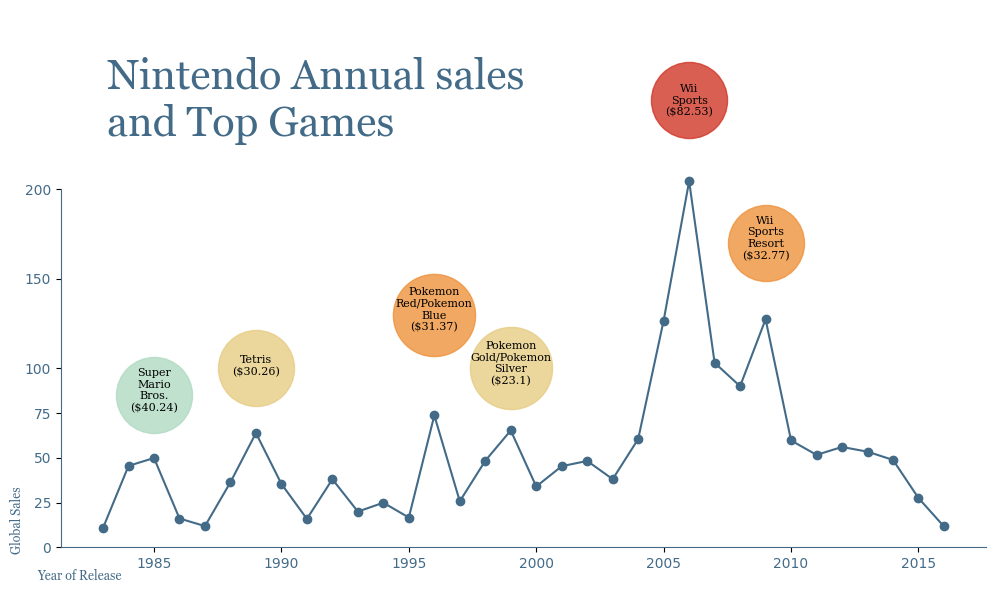

In [17]:
#-------------------Data-------------------------
df = pd.read_csv('vgsales.csv')
# Get only games Publised by 'Nintendo'
df_task_6 = df[df['Publisher'] == 'Nintendo']

# Drop values where Year or global sales are missing
df_task_6 = df_task_6.dropna(subset=['Year_of_Release', 'Global_Sales'])

# Change dtype for Year from float to integer
df_task_6['Year_of_Release'] = df_task_6['Year_of_Release'].astype(int)

# Group  data by Year and sum global sales for each year
annual_sales = df_task_6.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

## Define years with pick sales
### Those years were defined visually, after plotting a single line plot
years_to_display = [1985, 1989, 1996, 1999, 2006, 2009]

## Create a list to store top games
top_games = []

## Find top game for each year in the list years_to_display
for year in years_to_display:
    top_game = df_task_6[df_task_6['Year_of_Release'] == year].sort_values(by='Global_Sales', ascending=False).head(1)
    top_games.append({
        'Year': year,
        'Name': top_game['Name'].values[0],
        'Global_Sales': top_game['Global_Sales'].values[0]
    })
    
# ----------------Data Parameters------------------------

## Set Y position of bubbles, for X we can use years_to_display list
bubbles_y_positions = [85, 100, 130, 100, 250, 170] 

## Set sizes for bubbles
bubbles_sizes = [3000, 3000, 3500, 3500, 3000, 3000]

## Colours for bubbles
bubbles_colours = ['#b0dac2', '#e6cc84', '#ee923c', '#e6cc84', '#d13728', '#ee923c']

## Set position for text, in order to avoid skewness
text_positions = [75, 95, 120, 90, 240, 160]

## Set values for Y axis
y_axis_values = [0, 25, 50, 75, 100, 150, 200]

# ----------------Create a base line plot------------

## Create a space for plot
plt.figure(figsize=(10, 6))
## Plot line chart Year VS Sales
plt.plot(annual_sales['Year_of_Release'], annual_sales['Global_Sales'], marker='o', color='#436b88')

# -------------Create additional bubble plot-------------

## Run loop though data and parameters we prepared earlier
for i, game in enumerate(top_games):
    
##                   X position          Y posotion             sizes               colours             colour density 
    plt.scatter(years_to_display[i], bubbles_y_positions[i], s=bubbles_sizes[i], color=bubbles_colours[i], alpha=0.8)

## Fit name into a bubble by splitting each word in the name in new row
    game_name_with_newlines = "\n".join(game['Name'].split())
## Game Names + sales: X pos.         Y position            splitted name     new row       sale figure       font size      font          horiz. and vert. align.
    plt.text(years_to_display[i], text_positions[i], f"{game_name_with_newlines}\n(${game['Global_Sales']})", fontsize=8, family='serif', ha='center', va='bottom')

# --------------Plot Parameters--------------------------

## Title:           text                          horiz. al.  font size         colour         font           XY position
plt.title('Nintendo Annual sales \nand Top Games', ha='left', fontsize=30, color='#436b88',family='Georgia', x=0.05, y=0.75)

## X label
plt.xlabel('Year of Release', fontsize=9, color='#436b88',family='Georgia')

## Y label 
plt.ylabel('Global Sales', fontsize=9, color='#436b88',family='Georgia')

## Get axis for modifications
ax = plt.gca()

## Remove top line
ax.spines['top'].set_visible(False)

## Remove right line
ax.spines['right'].set_visible(False)

## Remove line after 200 on Y axis
ax.spines['left'].set_bounds(0, 200)

## Set colours for XY axis
ax.spines['left'].set_color('#436b88')  
ax.spines['bottom'].set_color('#436b88') 

## Set labels for XY in the corner
ax.xaxis.set_label_coords(0.02, -0.04)
ax.yaxis.set_label_coords(-0.04, 0.05)

## Set values (for Y), font and colours for values on XY axis
plt.yticks(y_axis_values, family='sans-serif', color='#436b88')
plt.xticks(family='sans-serif', color='#436b88')

## Remove the gris lines
plt.grid(False)

## Set extra space on the top
plt.ylim(0, 300)

## adjust layout 
plt.tight_layout()

## display plot
plt.show()


## Data displaied

In this task, the goal was to present statistically important information that highlights Nintendo's success over time, as well as the contribution of top-selling games to the publisher's overall performance.

Given the scenario, previous tasks, and the dataset, I believe it is important for viewers to understand how a top publisher like Nintendo has developed over time and which games played the most significant roles in driving the company's success. This is why the plot not only displays Nintendo's annual global sales but also highlights the most successful games in key years.

The line chart effectively illustrates the sales trends over time, making it clear when Nintendo's best years were. The bubbles highlighted on the most successful years give an additional layer of insight, showing which games caused those peaks in performance.

### Plot Type
Initially, I considered using an accumulative distribution plot, a common method for visualising share prices. However, I realised that this approach would add some bias on the visual, leading viewers to assume similarities between sales and share price dynamics. This could cause confusion and lead to incorrect conclusions since sales dynamics do not necessarily follow the same pattern as share prices due to factors such as capital and operational expenditures.

Instead, I chose to use a traditional line chart to display the sales trend. This decision was made to ensure the data is presented in a straightforward, easily interpretable manner that focuses on the raw sales data, avoiding any misleading projections.

## Visual techniques explanation

### Font
For consistency, we used serif fonts, primarily "Times New Roman" and "Georgia," as we have in most of our visualisations. The use of serif fonts throughout the CA was discussed earlier, with their readability and professionalism cited as the main reasons for their selection.

While we typically use a blue font colour in our visuals to align with our palette, I decided to use a black text inside the bubbles to improve readability against the varying colours and sizes of the bubbles. The contrast between the black font and the bubble colours ensures that the text remains visible, even when the bubble sizes differ significantly.

### Colours
In this plot, we maintained the same colour palette for the bubbles as in previous tasks. The colours are used to rank the top games, with brighter, more prominent colours assigned to higher-selling games. This visual solution allows viewers to quickly identify the most successful games relative to the others without needing to focus  on the numerical values.

### Frames
I decided to keep only the Y and X axes in the plot, as they display critical values such as global sales and the year of release. All other frames were removed to create a cleaner, more focused visualisation. This minimalist approach prevents distractions, directing the viewer's attention to the data trends and highlighted games.

### Labels
The font size for the X and Y labels was reduced to 9, ensuring that they do not dominate the visual but are still clear enough for viewers to read. The labels themselves were placed in the lower left corner to maintain balance in the composition without interfering with the main elements of the plot.

# References 

Painter, E.,  Zwar, J., Carino, S. and Kermonde, Z. (2018) Best practice data visualisation: guidelines and case study.

Atz, U., Heath, T., Heil, M., Hardinges, J., Fawcett. J. and Lee Y (2014) Best practice visualisation, dashboard and key figures report.

Lonsdale D. (2019) Design2Inform: Information visualisation.

Rahlf T. (2017) Data visualisation with R: 100 examples

https://github.com/CCT-Dublin/data-visualisation-techniques-ca1-Ilia-Grishkin